# PyTorch

## Импорт библиотек

In [1]:
import torch
print(torch.cuda.is_available())

True


## Тензор

### Создание Тензора

In [3]:
torch.tensor([2,3]) 

tensor([2, 3])

In [3]:
# тензор двумерного массива с объявлением типа данных
torch.tensor([[2,3], [4,5]], dtype=torch.int32)

tensor([[2, 3],
        [4, 5]], dtype=torch.int32)

In [4]:
# тензор двумерного массива с объявлением типа данных FLOAT (важно, если requires_grad=True)
# requires_grad=True - для этого тензора будут вычисляться градиенты во всех функциях, где он будет участвовать
torch.tensor([[2,3], [4,5]], dtype=torch.float32, requires_grad=True)

tensor([[2., 3.],
        [4., 5.]], requires_grad=True)

In [7]:
# создание и перемещение тензора на графический процессор
torch.tensor([[2,3],[4,5]], device=torch.device('cuda:0'))

tensor([[2, 3],
        [4, 5]], device='cuda:0')


### Основные свойства и методы Тензора

In [26]:
tensor = torch.tensor([[[2,3], [4,5]], [[6,7], [8,9]]], dtype=torch.float32, requires_grad=True)

In [27]:
tensor

tensor([[[2., 3.],
         [4., 5.]],

        [[6., 7.],
         [8., 9.]]], requires_grad=True)

In [32]:
#тип переменных

tensor.dtype

torch.float32

In [33]:
# размер тензора

print(tensor.shape)
print(tensor.size())

torch.Size([2, 2, 2])
torch.Size([2, 2, 2])


In [34]:
# количество осей в тензоре

tensor.ndim

3

In [35]:
# обращение к элементу тензора (это тоже не число, а тензор)

tensor[0,0,0]

tensor(2., grad_fn=<SelectBackward0>)

In [36]:
type(tensor[0,0,0])

torch.Tensor

In [37]:
#получение непосредственно числа (из элемента тензора)

tensor[0,0,0].item()

2.0

In [38]:
type(tensor[0,0,0].item())

float

### Создание Тензоров разного размера

In [40]:
#матрица со всеми нулями заданной размерности

tensor = torch.zeros([2,3,2])
tensor

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])

In [42]:
#матрица со всеми единицами заданной размерности

tensor = torch.ones([2,3,2], dtype=torch.int32)
tensor

tensor([[[1, 1],
         [1, 1],
         [1, 1]],

        [[1, 1],
         [1, 1],
         [1, 1]]], dtype=torch.int32)

In [44]:
#матрица со всеми нулями и размерностью аналогично той матрице, что предана в метод

tensor = torch.zeros_like(tensor)
tensor

tensor([[[0, 0],
         [0, 0],
         [0, 0]],

        [[0, 0],
         [0, 0],
         [0, 0]]], dtype=torch.int32)

In [47]:
# матрица размерностью аналогично той, что предана в метод, но заполнена переданным элементом

tensor = torch.full_like(tensor, 7)
tensor

tensor([[[7, 7],
         [7, 7],
         [7, 7]],

        [[7, 7],
         [7, 7],
         [7, 7]]], dtype=torch.int32)

In [49]:
#тензор со значениями заданного диапазона и с указанным шагом

torch.arange(2, 10, 0.5)

tensor([2.0000, 2.5000, 3.0000, 3.5000, 4.0000, 4.5000, 5.0000, 5.5000, 6.0000,
        6.5000, 7.0000, 7.5000, 8.0000, 8.5000, 9.0000, 9.5000])

In [55]:
# диагональная матрица

torch.diag(torch.tensor([3,2]))

tensor([[3, 0],
        [0, 2]])

In [56]:
# единичная матрица

torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [60]:
# нижняя треугольная матрица

torch.tril(torch.tensor([[1,2,3],[2,3,4],[3,4,5]]))

tensor([[1, 0, 0],
        [2, 3, 0],
        [3, 4, 5]])

### Изменение размера, создание дополнительных осей

In [77]:
tensor = torch.tensor([1,2,3,4])
tensor

tensor([1, 2, 3, 4])

In [78]:
# Изменение размера тензора

tensor_1 = tensor.view([4,1])
tensor_2 = tensor.reshape([2,2])

print(tensor_1, '\n\n', tensor_2)

tensor([[1],
        [2],
        [3],
        [4]]) 

 tensor([[1, 2],
        [3, 4]])


In [79]:
# Добавление осей

print(tensor, tensor.shape) # до добавления оси

tensor = torch.unsqueeze(tensor, 0) # добавление оси

print(tensor, tensor.shape) # после добавления оси

tensor([1, 2, 3, 4]) torch.Size([4])
tensor([[1, 2, 3, 4]]) torch.Size([1, 4])


### Арифметические операции и мат. функции

In [82]:
# Арифметические операции

tensor = torch.tensor([1,2,3,4,5])

tensor_prod = tensor * 5
tensor_sum = tensor + torch.tensor([1,2,3,4,5])

#!!!! ТАК ДЕЛАТЬ НЕЛЬЗЯ - ТЕНЗОР СО СПИСКОМ НЕ СКЛАДЫВАЮТ. !!!!#
#          tensor_sum = tensor + [1,2,3,4,5]

print(tensor_prod, tensor_sum, sep='\n\n')

tensor([ 5, 10, 15, 20, 25])

tensor([ 2,  4,  6,  8, 10])


In [84]:
# Математические функции

tensor = torch.tensor([1,2,3,4,5,6], dtype = torch.float32)

print('Sum: ', tensor.sum())
print('Mean: ', tensor.mean())

Sum:  tensor(21.)
Mean:  tensor(3.5000)


In [168]:
# Математические функции по осям тензора

tensor = torch.tensor([1,2,3,4,5,6], dtype = torch.float32)
tensor = tensor.view([2,3]) #изменим размерность тензора, чтобы было видно, что измерение происходит по осям

tensor_mean = tensor.mean(dim=1,
                          #keepdim=True
                         )

#keepdim=True - ось, по котрой считается среднее значение НЕ УДАЛЯЕТСЯ
tensor_mean_keepdim = tensor.mean(dim=1,
                          keepdim=True
                         )

print('Transformed Tensor: \n', f'\033[94m{tensor}\033[0m', '\n')
print('Tensor with means by axes:', f'\033[94m{tensor_mean}\033[0m', '\n')
print('Shape of tensor with means by axes: ', f'\033[94m{tensor_mean.shape}\033[0m', '\n')
print('\033[91mWith keepdim:\033[0m')
print('Tensor with means by axes:\n', f'\033[94m{tensor_mean_keepdim}\033[0m', '\n')
print('Shape of tensor with means by axes: ', f'\033[94m{tensor_mean_keepdim.shape}\033[0m', '\n')

Transformed Tensor: 
 tensor([[1., 2., 3.],
        [4., 5., 6.]]) 

Tensor with means by axes: tensor([2., 5.]) 

Shape of tensor with means by axes:  torch.Size([2]) 

With keepdim:
Tensor with means by axes:
 tensor([[2.],
        [5.]]) 

Shape of tensor with means by axes:  torch.Size([2, 1]) 



### Перевод Тензора на GPU или CPU

In [142]:
#доступность центрального процессора
print(torch.cpu.is_available())

#доступность графического процессора
print(torch.cuda.is_available())

True
True


##### По умолчанию все тензоры создаются на CPU

In [154]:
tensor = torch.tensor([1.,2.,3.], requires_grad=True) 
# requires_grad=True - PyTorch запоминает всё, что с происходит с тензором, чтобы потом автоматически рассчитать производные (градиенты)

In [157]:
#Способы перевести тензор на CPU (переносится копия)

tensor_1 = tensor.cpu()
print(tensor_1)
tensor_2 = tensor.to('cpu')
print(tensor_2)

tensor([1., 2., 3.], requires_grad=True)
tensor([1., 2., 3.], requires_grad=True)


In [159]:
#Способы перевести тензор на GPU (переносится копия)

tensor_3 = tensor.cuda()
print(tensor_3)
tensor_4 = tensor.to('cuda')
print(tensor_4)

tensor([1., 2., 3.], device='cuda:0', grad_fn=<ToCopyBackward0>)
tensor([1., 2., 3.], device='cuda:0', grad_fn=<ToCopyBackward0>)


##### Безопасный способ перевода тензора на GPU

In [161]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tensor = tensor.to(device)
tensor.device

device(type='cuda', index=0)

<div class="alert alert-block alert-danger"> Нельзя делать совместные операции, если один тензор на GPU, а другой на CPU  </div>

##### Перенос тензора на CPU

In [165]:
new_tensor_1 = tensor_3.cpu()
new_tensor_1

tensor([1., 2., 3.], grad_fn=<ToCopyBackward0>)

##### Перенос тензора на CPU c откреплением графа вычислений градиента этого тензора

In [167]:
new_tensor_2 = tensor_3.cpu().detach()
new_tensor_2

tensor([1., 2., 3.])

## Задача классификации

Для данной задачи будет использован датасет **MNIST**.

##### Импорт библиотек

In [2]:
# Основные библиотеки
import torchvision

from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split

In [3]:
# Вспомогательные библиотеки

import os
import json
import numpy as np
import matplotlib.pyplot as plt

# для загрузки изображений
from PIL import Image 

In [4]:
# Библиотеки для загрузки данных

import struct
import sys

from array import array
from os import path

### Трансформация MNIST в файловую структуру

In [104]:
#считываем данные в переменные

train_dataset = torchvision.datasets.MNIST(root='/content/sample_data/', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='/content/sample_data/', train=False, download=True)

100.0%
100.0%
100.0%
100.0%


In [105]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/sample_data/
    Split: Train

**Формат MNIST файлов:**
 - t10k-images-idx3-ubyte - это ОДИН бинарный файл, который содержит ВСЕ 10,000 тестовых изображений
 - t10k-labels-idx1-ubyte - это ОДИН бинарный файл, который содержит ВСЕ 10,000 соответствующих меток

**Структура файлов:**
 - Для файла с изображениями:
   
     [магическое число] [количество изображений] [высота] [ширина]
   
     [пиксели изображения 1]
   
     [пиксели изображения 2]
   
     ...
   
     [пиксели изображения 10000]
   
 - Для файла с метками:
   
     [магическое число] [количество меток]

   
     [метка 1] [метка 2] ... [метка 10000]

**Магическое число нужно, так как это:**
 - Идентификация формата - программа может проверить, что это действительно MNIST файл
 - Защита от ошибок - если магическое число не совпадает, файл поврежден или имеет неверный формат
 - Определение endianness - порядок байтов (big-endian в случае MNIST)
     

In [106]:
len(train_dataset)

60000

In [107]:
train_dataset[2000]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [108]:
train_dataset[2000][0]

In [109]:
train_dataset[2000][1]

5

#### Функция считывания данных MNIST
 - реализована так, чтобы все данные считывались разово, а не поэлементно
 - данные считываются в бинарном формате

In [4]:
def read_MNIST_ds(dataset):
    # Проверяем, какой датасет нужно загрузить - тренировочный или тестовый
    if dataset == "training":
        # Путь к файлу с изображениями тренировочного набора
        path_img = "/content/sample_data/MNIST/raw/train-images-idx3-ubyte"
        # Путь к файлу с метками тренировочного набора
        path_lbl = "/content/sample_data/MNIST/raw/train-labels-idx1-ubyte"
    
    elif dataset == "testing":
        # Путь к файлу с изображениями тестового набора
        path_img = "/content/sample_data/MNIST/raw/t10k-images-idx3-ubyte"
        # Путь к файлу с метками тестового набора
        path_lbl = "/content/sample_data/MNIST/raw/t10k-labels-idx1-ubyte"
    
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Открываем файл с метками для чтения в бинарном режиме
    with open(path_lbl, 'rb') as f_lable:
        # Читаем первые 8 байт и распаковываем их как два беззнаковых целых числа (big-endian)
        # Первое число - магическое число, второе - количество меток
        magic, lbl_size = struct.unpack(">II", f_lable.read(8))
        if magic != 2049:
            raise ValueError("Это не MNIST lables файл!")
        else:
            # Читаем оставшиеся байты файла и сохраняем как массив знаковых байтов
            lables_arr = array("b", f_lable.read())

    # Открываем файл с изображениями для чтения в бинарном режиме
    with open(path_img, 'rb') as f_img:
        # Читаем первые 16 байт и распаковываем как четыре беззнаковых целых числа (big-endian)
        # Магическое число, количество изображений, количество строк, количество столбцов
        magic, img_size, rows, cols = struct.unpack(">IIII", f_img.read(16))
        if magic != 2051:
            raise ValueError("Это не MNIST images файл!")
        else:
            # Читаем оставшиеся байты файла и сохраняем как массив беззнаковых байтов
            img_arr = array("B", f_img.read())

    if lbl_size == img_size:
        size = img_size
    else:
        print('Количество меток не соответствует количеству изображений')
        
    return lables_arr, img_arr, size, rows, cols

In [111]:
read_done = read_MNIST_ds('testing')

In [132]:
[type(i) for i in read_done]

[array.array, array.array, int, int, int]

In [134]:
print([i[:10] for i in read_done if isinstance(i, array)])

[array('b', [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]), array('B', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]


#### Преобразование MNIST-датасета из бинарного формата в отдельные JPEG файлы, организованные по папкам классов

In [113]:
def write_dataset(labels, data, size, rows, cols, output_dir):

    #-----------------------------------------------------# 
    #             Подготовка папок с классами             #
    #-----------------------------------------------------#
    
    # Словарь с именами папок для каждого класса (0-9)
    classes = {i: f"class_{i}" for i in range(10)}

    # Список путей к папкам для каждого класса
    #пример ...education\neural_networks_course\libs\pytorch\mnist_dataset\training\class_0

    output_dirs = [
        path.join(output_dir, classes[i])
        for i in range(10)
    ]
    
    # Сооздание папок, если они не существуют
    for dir in output_dirs:
            if not path.exists(dir):
                os.makedirs(dir)
                print(f"Создана папка: {dir}") 

    #-----------------------------------------------------# 
    # Запись данных - основной цикл по всем изображениям  #
    #-----------------------------------------------------#
    
    for (i, label) in enumerate(labels):
            # Имя файла: "/training/class_0/123.jpg"
            output_filename = path.join(output_dirs[label], str(i) + ".jpg")
            print("writing: " + output_filename)

            with open(output_filename, "wb") as h:
            # Извлекаем пиксели каждого изображения из большого массива
                data_i = [
                    data[ (i*rows*cols + j*cols) : (i*rows*cols + (j+1)*cols) ]
                    for j in range(rows)
                ]
                
             # Преобразует в numpy массив размером rows x cols
            data_array = np.asarray(data_i)
        
             # Создаем изображение из массива и сохраняет как JPEG с именем файла, сделанном в первом пункте цикла
            im = Image.fromarray(data_array)
            im.save(output_filename)

In [118]:
# Проверка, куда сохраняю файлы

output_path = os.path.join(os.getcwd(), "ds/mnist")
print("Папка будет создана здесь:", output_path)

Папка будет создана здесь: C:\Users\metel\education\neural_networks_course\libs\ds/mnist


In [ ]:
# Обрабатывает оба датасета: тренировочный и тестовый
for dataset in ["training", "testing"]:
    write_dataset(*read_MNIST_ds(dataset), path.join(output_path, dataset))

### Создание своего класса для датасета MNIST
пользовательский класс с 3 методами:
- Конструктор
- Получение длины датасета
- Извлечение кортежа (образец, ответ)

In [5]:
# Наследование от класса Dataset из torch.utils.data

class MNIST_DS(Dataset):
    def __init__(self, path, transform=None):
        self.path = path             #переданный путь до папки класса
        self.transform = transform   #трансформация - будет использоваться дальше, т.е. вместо transform будут подставляться различные функции

        self.len_dataset = 0 # длина ds (кол-во файлов в эказанной папке)
        self.data_list = []  # список из кортежей (путь до файла, позиция в one-hot векторе)
        self.class_to_index = {}

        for path_dir, dir_list, file_list in os.walk(path): # см. описание ниже
            if path_dir == path:
                self.classes = sorted(dir_list) # названия папок - это и есть классы, поэтому сохраняем в таком виде
                                        # создаем словарь {class_0: 0, class_1:1 ...}
                self.class_to_index = { 
                    cls_name: i for i, cls_name, in enumerate(self.classes)
                }
                continue #создали на уровне папок классов словарь, а то что дальше это уже следующая итерация os.walk(path) с файлами
                
            cls = path_dir.split('\\')[-1]

            for name_file in file_list:
                file_path = os.path.join(path_dir, name_file)
                self.data_list.append((file_path, self.class_to_index[cls]))

            self.len_dataset += len(file_list)        
                

    def __len__(self):
        return self.len_dataset

    
    def __getitem__ (self, index):
        file_path, target = self.data_list[index]
        sample = np.array(Image.open(file_path)) # возвращает изображение в формате PIL (ф-ция из PIL-library)

        if self.transform is not None:           # если трансформации заданы, то применим их к изображению
            sample = self.transform(sample)

        return sample, target

**os.walk(path)**:

   это генератор, который рекурсивно обходит дерево каталогов и возвращает информацию о файлах и папках
- path - текущий путь
- dir_list - список поддиректорий
- file_list - список файлов

**Сбалансированность классов**

In [25]:
mnist_path = os.path.join(os.getcwd(), "ds/mnist/training")

In [26]:
sum = 0
for path, dir_list, file_list in os.walk(mnist_path):
    print(f'{path.split("/")[-1]}')
    print(f'  - количество файлов: {len(file_list)}')
    sum += len(file_list)
print(sum)

training
  - количество файлов: 0
training\class_0
  - количество файлов: 5923
training\class_1
  - количество файлов: 6742
training\class_2
  - количество файлов: 5958
training\class_3
  - количество файлов: 6131
training\class_4
  - количество файлов: 5842
training\class_5
  - количество файлов: 5421
training\class_6
  - количество файлов: 5918
training\class_7
  - количество файлов: 6265
training\class_8
  - количество файлов: 5851
training\class_9
  - количество файлов: 5949
60000


#### Создание тренировочного и тестового датасетов

In [6]:
train_data = MNIST_DS(os.path.join(os.getcwd(), "ds/mnist/training"))
test_data = MNIST_DS(os.path.join(os.getcwd(), "ds/mnist/testing"))

In [6]:
train_data.classes

['class_0',
 'class_1',
 'class_2',
 'class_3',
 'class_4',
 'class_5',
 'class_6',
 'class_7',
 'class_8',
 'class_9']

In [49]:
train_data.class_to_index

{'class_0': 0,
 'class_1': 1,
 'class_2': 2,
 'class_3': 3,
 'class_4': 4,
 'class_5': 5,
 'class_6': 6,
 'class_7': 7,
 'class_8': 8,
 'class_9': 9}

In [50]:
train_data.len_dataset

60000

In [51]:
test_data.len_dataset

10000

In [7]:
# Представление в виде one-hot vector

for cls, one_hot_position in train_data.class_to_index.items():
    zero_mtx = np.zeros(10)
    zero_mtx[one_hot_position] = 1
    print(cls, ' => ',zero_mtx)

class_0  =>  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
class_1  =>  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
class_2  =>  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
class_3  =>  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
class_4  =>  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
class_5  =>  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
class_6  =>  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
class_7  =>  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
class_8  =>  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
class_9  =>  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
# Проверка метода len

print(f'Длина тренировочного датасета: {len(train_data)}')
print(f'Длина тестового датасета:      {len(test_data)}')

Длина тренировочного датасета: 60000
Длина тестового датасета:      10000


Класс - class_5


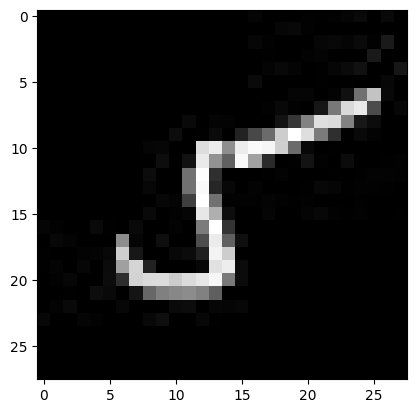

In [10]:
# Проверка метода getitem
# index: 0 ... 59999

img, target_class = train_data[32641]

print(f'Класс - {train_data.classes[target_class]}')
plt.imshow(img, cmap = 'gray')

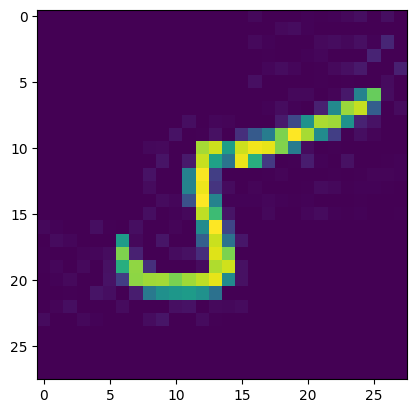

In [11]:
plt.imshow(img)

#### Обучающая, Валидационная и Тестовая выборки

In [13]:
# Разбиение на выборки

train_data, val_data = random_split(train_data, [0.8, 0.2])

In [15]:
print(f'Длина тренировочных данных: {len(train_data)}')
print(f'Длина валидационных данных: {len(val_data)}')
print(f'Длина тестового данных:     {len(test_data)}')

Длина тренировочных данных: 48000
Длина валидационных данных: 12000
Длина тестового данных:     10000


In [17]:
# Разбиение на батчи

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

In [20]:
for i, (samples, target) in enumerate(train_loader):
     if i < 3:
         print(f"Номер batch = {i+1}")
         print(f"    размер samples = {samples.shape}")
         print(f"    размер target = {target.shape}")

print('\n ...... \n')
print(f"Номер batch = {i+1}")
print(f"    размер samples = {samples.shape}")
print(f"    размер target = {target.shape}")

Номер batch = 1
    размер samples = torch.Size([16, 28, 28])
    размер target = torch.Size([16])
Номер batch = 2
    размер samples = torch.Size([16, 28, 28])
    размер target = torch.Size([16])
Номер batch = 3
    размер samples = torch.Size([16, 28, 28])
    размер target = torch.Size([16])

 ...... 

Номер batch = 3000
    размер samples = torch.Size([16, 28, 28])
    размер target = torch.Size([16])


### Использование класса ImageFolder

#### Создание тренировочного и тестового датасетов

In [40]:
train_data = ImageFolder(root = os.path.join(os.getcwd(), "ds/mnist/training"))
test_data = ImageFolder(root = os.path.join(os.getcwd(), "ds/mnist/testing"))                        

In [41]:
train_data.classes

['class_0',
 'class_1',
 'class_2',
 'class_3',
 'class_4',
 'class_5',
 'class_6',
 'class_7',
 'class_8',
 'class_9']

In [42]:
train_data.class_to_idx

{'class_0': 0,
 'class_1': 1,
 'class_2': 2,
 'class_3': 3,
 'class_4': 4,
 'class_5': 5,
 'class_6': 6,
 'class_7': 7,
 'class_8': 8,
 'class_9': 9}

In [43]:
# Проверка метода len

print(f'Длина тренировочного датасета: {len(train_data)}')
print(f'Длина тестового датасета:      {len(test_data)}')

Длина тренировочного датасета: 60000
Длина тестового датасета:      10000


In [44]:
 train_data[32641]

(<PIL.Image.Image image mode=RGB size=28x28>, 5)

Класс - class_5


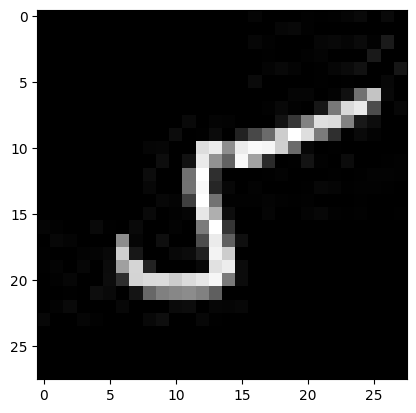

In [45]:
# Проверка метода getitem
# index: 0 ... 59999

img, target_class = train_data[32641]

print(f'Класс - {train_data.classes[target_class]}')
plt.imshow(img, cmap = 'gray')

#### Обучающая, Валидационная и Тестовая выборки

In [46]:
# Разбиение на выборки

train_data, val_data = random_split(train_data, [0.8, 0.2])

In [47]:
print(f'Длина тренировочных данных: {len(train_data)}')
print(f'Длина валидационных данных: {len(val_data)}')
print(f'Длина тестового данных:     {len(test_data)}')

Длина тренировочных данных: 48000
Длина валидационных данных: 12000
Длина тестового данных:     10000


In [48]:
# Разбиение на батчи

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

## Задача регресии

In [5]:
# Импорт библиотек

import json

In [155]:
# проверка работы метода для дальнейшего использования

os.path.isdir("ds\\MNIST")

True

### Создание датасета изображений с балыми квадратами на черном фоне

In [60]:
# Создание директории для датасета
if not os.path.isdir("ds\\BWSquare"):
    os.mkdir("ds\\BWSquare")

# Генерация 100000 черных изображений 64x64, 0-50 = оттенки черного
img = np.random.randint(0, 50, [100000, 64, 64], dtype=np.uint8)
# Генерация 100000 белых квадратов 15x15  100-200 = оттенки белого
white_squares = np.random.randint(100, 200, [100000, 15, 15], dtype=np.uint8)

# Массив для координат центра квадрата
coords = np.empty([100000, 2])

data = {}
for i in range(img.shape[0]):
    # Случайные координаты центра квадрата (в пределах 20-44)
    x = np.random.randint(20, 44)
    y = np.random.randint(20, 44)
    
    # Вставка белого квадрата в черное изображение
    img[i, (y - 7):(y + 8), (x - 7):(x + 8)] = white_squares[i]
    
    # Сохранение координат
    coords[i] = [y, x]
    
    # Сохранение изображения как JPEG
    name_img = f'img_{i}.jpeg'
    path_img = os.path.join('ds\\BWSquare\\', name_img)
    image = Image.fromarray(img[i])
    image.save(path_img)
    
    # Добавление в словарь аннотаций
    data[name_img] = [y, x]

# Сохранение всех аннотаций в JSON файл
with open('ds\\BWSquare\\coords.json', 'w') as f:
    json.dump(data, f, indent=2)   

### Создание пользовательского класса BWSquare_DS

In [64]:
# проверка для дальнейшего использования

with open('ds\\BWSquare\\coords.json', 'r') as f:
            target_dict = json.load(f)
print(type(target_dict))  # <class 'dict'>
print(len(target_dict))   # количество элементов
print(target_dict['img_4.jpeg'])

<class 'dict'>
100000
[37, 42]


In [17]:
class BWSquare_DS(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform

        self.img_list = []
        with open('ds\\BWSquare\\coords.json', 'r') as f:
            self.target_dict = json.load(f)
            
        for root, dirs, files in os.walk('ds\\BWSquare'):
            for file in files:
                full_path = os.path.join('ds\\BWSquare\\', file)
                if file in self.target_dict:
                    self.img_list.append((full_path, self.target_dict[file]))

        self.len_dataset = len(self.img_list)

        

    def __len__(self):
        return self.len_dataset

    def __getitem__(self, index):

        img = np.array(Image.open(self.img_list[index][0]))

        if self.transform is not None:
            img = self.transform(img)
            
        coord = np.array(self.img_list[index][1])
        
        return img, coord
        

In [18]:
bws_dataset = BWSquare_DS(os.path.join(os.getcwd(), "ds/BWSquare"))

In [19]:
len(bws_dataset)

100000

Координаты центра: [20 25]


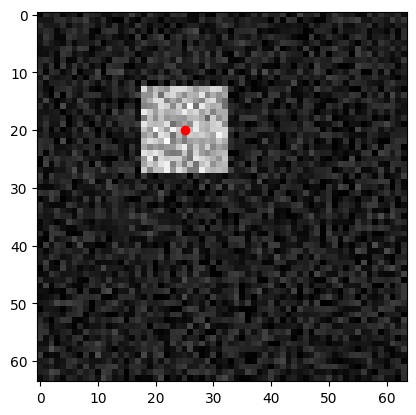

In [20]:
img, coord = bws_dataset[1874]
print(f'Координаты центра: {coord}')
plt.scatter(coord[1], coord[0], marker='o', color='red') # (x, y, marker=кружок, color=красный)
plt.imshow(img, cmap='gray')
plt.show() #красивый вывод (без наименования/характеристик объекта)

#### Обучающая, Валидационная и Тестовая выборки

In [21]:
bws_train_data, bws_val_data, bws_test_data = random_split(bws_dataset, [0.7, 0.1, 0.2])

In [22]:
print(f'Длина тренировочных данных: {len(bws_train_data)}')
print(f'Длина валидационных данных: {len(bws_val_data)}')
print(f'Длина тестового данных:     {len(bws_test_data)}')

Длина тренировочных данных: 70000
Длина валидационных данных: 10000
Длина тестового данных:     20000


In [23]:
# Разбиение на батчи

bws_train_loader = DataLoader(bws_train_data, batch_size=64, shuffle=True)
bws_val_loader = DataLoader(bws_val_data, batch_size=64, shuffle=False)
bws_test_loader = DataLoader(bws_test_data, batch_size=64, shuffle=False)

In [ ]:
for i, (samples, target) in enumerate(bws_train_loader):
     if i < 3:
         print(f"Номер batch = {i+1}")
         print(f"    размер samples = {samples.shape}")
         print(f"    размер target = {target.shape}")

print('\n ...... \n')
print(f"Номер batch = {i+1}")
print(f"    размер samples = {samples.shape}")
print(f"    размер target = {target.shape}")

Номер batch = 1
    размер samples = torch.Size([64, 64, 64])
    размер target = torch.Size([64, 2])
Номер batch = 2
    размер samples = torch.Size([64, 64, 64])
    размер target = torch.Size([64, 2])
Номер batch = 3
    размер samples = torch.Size([64, 64, 64])
    размер target = torch.Size([64, 2])
